# Exploratory data analisis


##### realizaremos un analsis para buscar relaciones en nuestros dataframes

In [80]:
import pandas as pd 
import numpy as np 
import pyarrow
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from wordcloud import WordCloud
import datetime as dt 


In [81]:
games = pd.read_parquet('C:/Users/hp/Desktop/HENRY/Soy henry Modulos/PI ML/PI MLOps - STEAM/datasets limpios/steam_games_limpio')
games 

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,id
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,761140.0
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,643980.0
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,670290.0
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,767400.0
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,772540.0
...,...,...,...,...,...,...,...,...,...
23910,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",http://steamcommunity.com/app/745400/reviews/?...,745400.0
23911,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,773640.0
23912,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,733530.0
23913,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,610660.0


In [82]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23643 entries, 0 to 23914
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     23643 non-null  object 
 1   genres        23643 non-null  object 
 2   app_name      23643 non-null  object 
 3   title         23643 non-null  object 
 4   url           23643 non-null  object 
 5   release_date  23643 non-null  object 
 6   tags          23643 non-null  object 
 7   reviews_url   23643 non-null  object 
 8   id            23643 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.8+ MB


In [83]:
# convertimos la columna 'release_date' a tipo datetime
games['release_date'] = pd.to_datetime(games['release_date'])

In [84]:
#cargamos el dataset user_reviews en la variable reviews
reviews = pd.read_parquet('C:/Users/hp/Desktop/HENRY/Soy henry Modulos/PI ML/PI MLOps - STEAM/datasets limpios/user_reviews_limpio')

In [85]:
# generalizamos un formato para la columna 'last_edited'
reviews['last_edited'] = pd.to_datetime(reviews['last_edited'], format='%Y-%m-%d', errors='coerce')
reviews

,user_id,user_url,posted,last_edited,item_id,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,NaT,1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-07-15,NaT,22200,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-04-21,NaT,43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,2014-06-24,NaT,251610,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,2013-09-08,NaT,227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...
59252,llDracuwulf,http://steamcommunity.com/id/llDracuwulf,2015-10-14,NaT,730,True,its FUNNNNNNNN
59255,76561198223837952,http://steamcommunity.com/profiles/76561198223...,2015-10-10,NaT,253980,True,Awesome fantasy game if you don't mind the gra...
59265,76561198229845636,http://steamcommunity.com/profiles/76561198229...,2015-10-31,NaT,730,True,Prettyy Mad Game
59267,76561198232478272,http://steamcommunity.com/profiles/76561198232...,2015-12-14,NaT,730,True,AMAZING GAME 10/10


In [86]:
# frecuencia que un usuario hace una review
reviews['user_id'].value_counts()

user_id
chicken_tonight      18
76561198044023118    18
76561198064484479    17
76561198063316459    14
thevalleykids        14
                     ..
mithriel              1
helldog22             1
76561198191010871     1
mistermooth           1
AusBacon              1
Name: count, Length: 22825, dtype: int64

Palabra: game, Frecuencia: 33778
Palabra: play, Frecuencia: 7420
Palabra: fun, Frecuencia: 5202
Palabra: one, Frecuencia: 5118
Palabra: good, Frecuencia: 4054
Palabra: time, Frecuencia: 3803
Palabra: make, Frecuencia: 3535
Palabra: great, Frecuencia: 3348
Palabra: will, Frecuencia: 3300
Palabra: played, Frecuencia: 3258


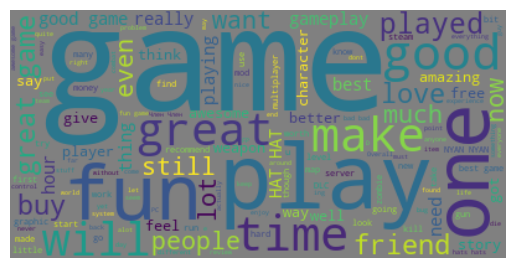

In [87]:
#hacemos que la columna review sea un texto para poder realizar la nube de palabras 
texto = ' '.join(reviews['review'])
# Crear la nube de palabras
wc = WordCloud(background_color='gray')
wc.generate(texto)

# Obtener las frecuencias de las palabras
frecuencias = wc.process_text(texto)

# Ordenar las palabras por frecuencia
palabras_ordenadas = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)

# Obtener las 10 palabras más frecuentes
top_10_palabras = palabras_ordenadas[:10]

# Imprimir las 10 palabras más frecuentes
for palabra, frecuencia in top_10_palabras:
    print(f'Palabra: {palabra}, Frecuencia: {frecuencia}')

# Mostrar la nube de palabras
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* podemos determinar que 22,825 usuarios diferente han hecho al menos una review  

In [88]:
    # de la libreria nltk importamos SentimentIntensityAnalyzer para nuestra columna 'Sentiment_Analisys'
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [89]:
# creamos la columna sentiment_analysis
# Crear un analizador de sentimientos VADER
sid = SentimentIntensityAnalyzer()

# Función para asignar valores de sentimiento
def assign_sentiment_score(text):
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 2  # Positivo
    elif compound_score <= -0.05:
        return 0  # Negativo
    else:
        return 1  # Neutral

# Aplicar el análisis de sentimiento y crear la nueva columna 'sentiment_analysis'
reviews['sentiment_analysis'] = reviews['review'].apply(assign_sentiment_score)

# Eliminar la columna 'review' original si es necesario
reviews.drop('review', axis=1, inplace=True)

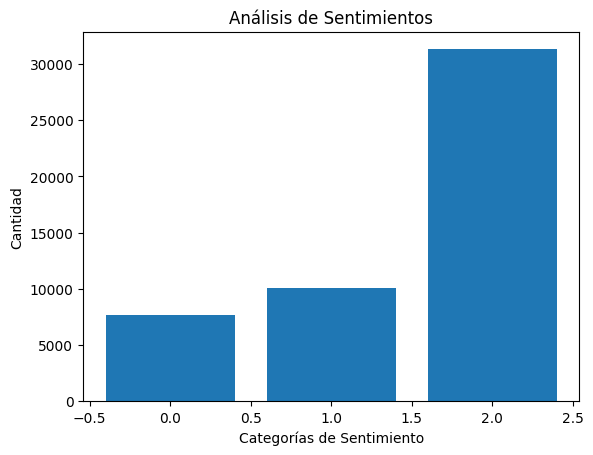

In [90]:
# Obtenemos el recuento de los reviews
conteo_categorias = reviews['sentiment_analysis'].value_counts()

# Crear el gráfico de barras para mostrar llos resultados 
plt.bar(conteo_categorias.index, conteo_categorias.values)
plt.title('Análisis de Sentimientos')
plt.xlabel('Categorías de Sentimiento')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

Encontramos que dentro de nuestro analisis de sentimientos 
* _31310_ reviews son positivas
* _10096_ son neutrales
* _7664_ son negativas  

In [91]:
#cargamos el dataset users_items  en la variable items
items = pd.read_parquet('C:/Users/hp/Desktop/HENRY/Soy henry Modulos/PI ML/PI MLOps - STEAM/datasets limpios/users_items_limpio')
items

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7.0,0.0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...,...,...,...,...
5170009,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,346330,BrainBread 2,0.0,0.0
5170010,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,373330,All Is Dust,0.0,0.0
5170011,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,388490,One Way To Die: Steam Edition,3.0,3.0
5170012,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,521570,You Have 10 Seconds 2,4.0,4.0


In [92]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5153209 entries, 0 to 5170013
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          object 
 3   user_url          object 
 4   item_id           object 
 5   item_name         object 
 6   playtime_forever  float64
 7   playtime_2weeks   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 353.8+ MB


In [93]:
# obtenemos las estadisticas descriptivas para la columna 'playtime_forever' 

print(f'minimo de tiempo jugado:', items['playtime_forever'].min(),'mins')
print(f'maximo de tiempo jugado:', items['playtime_forever'].max(),'mins')
print(f'promedio de timepo jugado:', items['playtime_forever'].mean().round(3),'mins')

print(f'la desviacion standar es:',items['playtime_forever'].std())
print(f'nuestros cuartiles son 1er:',items['playtime_forever'].quantile(.25),'tercer',items['playtime_forever'].quantile(.75))

minimo de tiempo jugado: 0.0 mins
maximo de tiempo jugado: 642773.0 mins
promedio de timepo jugado: 991.495 mins
la desviacion standar es: 5418.204404857233
nuestros cuartiles son 1er: 0.0 tercer 355.0


en la columna 'playtime_forever' encontramos que: 
* minimo de tiempo jugado: 0.0 mins
* maximo de tiempo jugado: 642773.0 mins
* promedio de timepo jugado: 991.495 mins
* la desviacion standar es: 5418.204404857233
* nuestros cuartiles son 1er: 0.0 tercer 355.0